<a href="https://colab.research.google.com/github/ManasMittal19/Algos/blob/Supervised-Learning/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Code for Multiple Linear Regression with just non - categorical inputs**




Including the required libraries and also loading the dataset from google drive as pandas dataframe



In [307]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


In [308]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
file_path = '/content/drive/MyDrive/IDBMS/50_Startups.csv'
df = pd.read_csv(file_path)

In [310]:
# Did basic feature scaling : not properly done as the data set is too small
df['R&D Spend'] = df['R&D Spend']/df['R&D Spend'].max()
df['Administration'] = df['Administration']/df['Administration'].max()
df['Marketing Spend'] = df['Marketing Spend']/ df['Marketing Spend'].max()
df['Profit'] = df['Profit']/df['Profit'].max()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,1.000000,0.749527,1.000000,New York,1.000000
1,0.983359,0.828805,0.940893,California,0.997557
2,0.927985,0.553781,0.864664,Florida,0.993699
3,0.873136,0.649738,0.812235,New York,0.951317
4,0.859438,0.500378,0.776136,Florida,0.864383
5,0.797566,0.546494,0.769126,New York,0.816549
6,0.814128,0.805926,0.270710,California,0.812031
7,0.788018,0.796789,0.686493,Florida,0.810107
8,0.729018,0.814249,0.660500,New York,0.791690
9,0.745906,0.595028,0.646443,California,0.778938


Step 1 : Separate the data in input and output variables and identity parameters and training examples

In [311]:
x_train = df.iloc[:, 0:3].to_numpy()

In [312]:
y_train = df.iloc[:,4].to_numpy()

In [313]:
m = x_train.shape[0] # m is the number of training examples
print("Number of training examples : " , m)
n =  (x_train[0].size)
print("Number of parameter : " , n)

Number of training examples :  50
Number of parameter :  3


Step 2 : Create output variables

In [314]:

w = np.zeros(n)
b = 0

Step 3 : Create a prediction function which takes x input vector and correspoing parametes and provides the output

In [315]:
# Here x is an input entry and w ,b are the parameters
def prediction(x, w,b ):
    dot_product = np.dot(x,w)
    dot_product = dot_product + b
    return dot_product

Step 4 : Create a costComupte function which can calculate the square error cost for a given data x_train

In [316]:

def costCompute (m,w,b,x_train,y_train) :

    """
      m : number of training examples (In batch gradient descent we need to use all of them)
      w , b : are the paramenters
      x_train : it is matrix of the input of training examples
      y_train : it is the array of the output produces
    """
    p = 0
    for i in range (0,m) :
      p = p + ( prediction(x_train[i],w,b) - y_train[i])**2
    p = p / (2*m)
    return p

Step 5 : Compute derivative function for implementing gradient descent

In [317]:


def computeDerivative (m , w,b,x_train,y_train) :
    """
    m : number of training examples
    w , b : parameters
    x_train , y_train : training data set
    dj_dw : array of all the derivative of cost function with respect to wj
    dj_db : derivative of cost function with respect to b
    """

    n =  (x_train[0].size)
    dj_dw =  np.zeros(n)
    dj_db = 0

    for i in range (0,m) :
      dj_db += (prediction(x_train[i],w,b) - y_train[i])

    dj_db = dj_db/m

    for i in range(0,n) :
       for j in range(0,m) :
          dj_dw[i] += (prediction(x_train[j],w,b) - y_train[j])*(x_train[j][i])
       dj_dw[i] = dj_dw[i]/m


    return dj_dw,dj_db


Step 6 : Implementation of the final gradient descent function

In [318]:



def gradientDescent(num_iter, w,b,alfa,n,m,x_train,y_train) :
  cost = np.zeros(num_iter)
  tempw = np.zeros(n)
  tempb = 0;
  for i in range (num_iter) :
     dj_dw , dj_db = computeDerivative(m,w,b,x_train,y_train)
     for j in range (0,n) :
       tempw[j] = w[j] - alfa * dj_dw[j];
     tempb = b - alfa * dj_db;
     w = tempw
     b = tempb
     cost[i] = costCompute(m,w,b,x_train,y_train);
  return w,b,cost


In [319]:

final_w, final_b,cost_arr = gradientDescent(100 ,w,b,0.1,n,m,x_train,y_train)

In [320]:
print(final_w,final_b)

[0.34640839 0.15119828 0.24161202] 0.22510414680008983


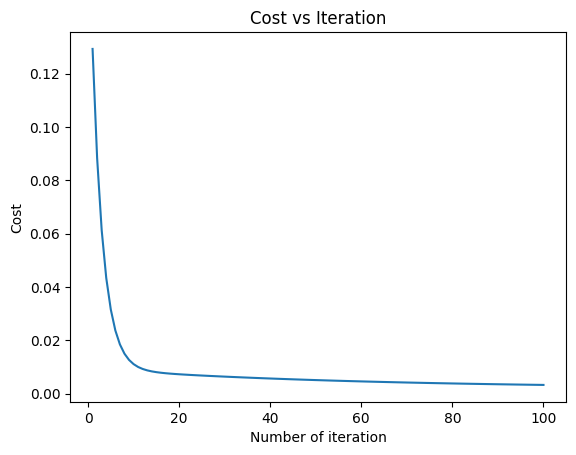

In [321]:


# Define the two arrays
x = np.arange(1, 101)

# Plot the graph
plt.plot(x, cost_arr)

# Add labels and title
plt.xlabel("Number of iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")

# Show the plot
plt.show()